Problem: 

Attrition is a huge problem for every company. This may lead to a huge loss to the company. However, if we can predetermine the chances of employee leaving the company then the company could save their employee from leaving the company. The company has captured the data of the employee and is recorded in the file attrition.csv. This data can be used to analyze employee attrition.

Machine Learning Problem - **Create a model which can predict whether the employee will leave the organisation or not**

## Experiment : Compare the performances of Random Forest and AdaBoost in predicting attrition.

## Experiments Steps
1. Read and checked the data for null and data types
2. Created the Features set ( After doing one hot encoding) and target variable
3. Created the stratified train test split
4. Initialize the Random Forest Classifier, with inital parameters and fit on training set
   > a. Draw the ROC curve to noted down the roc_auc_score for both training and test set
  
   > b. Draw the confusion matrix on test set
   
   > c. Print the classification report on the test set and take the note of 'Recall'
5. Perform the GridSearch to find the optimal parameters and fit the RandomForest with the best parameters and fit on training set
   > a. Draw the ROC curve to noted down the roc_auc_score for both training and test set
  
   > b. Draw the confusion matrix on test set
   
   > c. Print the classification report on the test set and take the note of 'Recall' 
6. Perform the Gridsearch to find the optimal parameters(learning_rate). Initialize the AdaboostClassifier with base classifier as DT, as RandomForest's base classifier is DT, with the best parameters and fit on training set
   > a. Draw the ROC curve to noted down the roc_auc_score for both training and test set
  
   > b. Draw the confusion matrix on test set
   
   > c. Print the classification report on the test set and take the note of 'Recall'
7. Experimented RandomForest with different values of ccp_alpha
8. Experimented with Adaboost with diferent values of learning rate

## Metrics Used in the experiment
- **ROC curve**: ROC gives the proportions of classes(negative and postive) that are collectly classified. ROC curve is a plot between sensitivity(TPR) on the veritcal axis and (1-specificity(FPR)( on the horizontal axis. roc_auc_score returns the area under the curve. This metrics can be used to understand the overall performance of the model and for model selections


- **RECALL**: It is the conditional probability that the predicted class is positive, given that actual class is positive. It is also known as sensitivity.


- **Reason for not using Precision or F-score**:  Precision is the the probability of "Actual Attrition cases" given that model predicted Attrited. In attrition problem I am not worried for the cases which are predicted as attrition case but actually they didnt left the company. I am worried for the cases which are actually attrition cases but not prediceted so by the model. The cases which are attrited but not predicted will cost much more than the case which are predicted as attrition but stayed with company.
F-Score is the harmonic mean of recall and precision and here as I am not take precision in consideration, I am not considering F-score too

## Experiment Observation



1. Randomforest 
    >ROC_AUC_Score - Training: `1.0`

    >ROC_AUC_Score - TesT: `0.79`

    > RECALL(Attrition = 1 ): `0.13` 

3. AdaBoost
    >ROC_AUC_Score - Training: `0.92`

    >ROC_AUC_Score - Test: `0.80`

    > RECALL(Attrition = 1 ): `0.34`

## Experiment Inference

Clearly Adaboost is giving the better result compared to Random Forest, the probable reasons for the same 

- Though both ensemble classification models are rarely overfit but in this case Random forest seems to overfit, The training AUC score is 1, but the test score is lesser as compared to Adaboost

- Adaboost on the other hand gave less training score but provide the better result on the test

- Adaboost probably giving better results as algorithm learns from errors in each iteration

**In this experiment Adaboost provide higher classification accuracy while Randomforest are more efficiecnt due to parallel execution**

## Further improvments

- More Random forest parmeters could have been explored to understand its performance, the no of trees etc. I tried to fit model with different values of cc_alpha, increasing the value of alpha showing negative impact on auc_score and recall
- Adaboost learning rate parameter could have been explored to improve the performance further. I tried to fit the model with higher learning rate - the recall was improving by AUC score was decreasing.

## Python Implemenation

In [6]:
#import the required libraries
import numpy as np
import pandas as pd
import os

from matplotlib import pyplot as plt
import seaborn as sn

from sklearn import metrics
import warnings
warnings.filterwarnings('ignore') 

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import AdaBoostClassifier


In [153]:
#import function library which I created in advance to draw ROC curve and Confustion matrix
import amlprep as ml

In [154]:
#read the data
os.chdir(r"C:\Users\shree\Desktop\Python")
df = pd.read_csv('attrition.csv')

In [155]:
df.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


In [156]:
df.info()  #checking for null and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   int64 
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   EducationField           1470 non-null   object
 5   EnvironmentSatisfaction  1470 non-null   int64 
 6   Gender                   1470 non-null   object
 7   JobInvolvement           1470 non-null   int64 
 8   JobLevel                 1470 non-null   int64 
 9   JobSatisfaction          1470 non-null   int64 
 10  MaritalStatus            1470 non-null   object
 11  MonthlyIncome            1470 non-null   int64 
 12  OverTime                 1470 non-null   object
 13  TotalWorkingYears        1470 non-null   int64 
 14  WorkLifeBalance          1470 non-null  

In [157]:
df.Attrition.value_counts(normalize=True)  # checking for the imbalance in data

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [160]:
# Creating the feature set or independent variables

X_features = list(df.columns)
X_features.remove('Attrition')
X_features

['Age',
 'BusinessTravel',
 'Department',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'OverTime',
 'TotalWorkingYears',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'DistanceFromHome']

In [161]:
#Lot of catergorial variables are there  so better to covert them in one hot encoding
encoded_df = pd.get_dummies(df[X_features],drop_first = True)

In [162]:
#Target and Independent variable
X = encoded_df
Y = df['Attrition']

In [163]:
#Creating the stratified train and test split
X_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=5)

In [164]:
sum(y_train==1)/len(X_train)  # checking if the split has equal percertage of Attrition yes and no cases

0.16132167152575316

In [34]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
clf.get_depth()  # to find the depth of fully grown tree

15

In [40]:
len(X_features)  # to find the max features of the tress

19

In [165]:
#Initialzing and fitting the defualt Random forest tree
rand_clf = RandomForestClassifier(max_depth=5)
rand_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

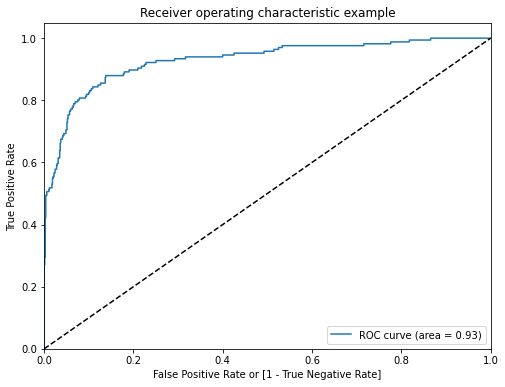

In [166]:
#trainig ROC curve
t_auc_score, t_fpr, t_tpr, t_thresholds = ml.draw_roc_curve(rand_clf,X_train,y_train)

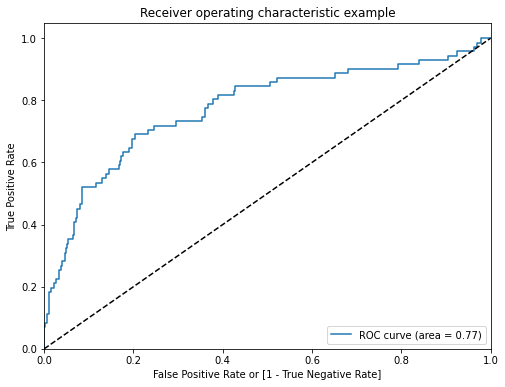

In [167]:
#Test ROC curve
auc_score, fpr, tpr, thresholds = ml.draw_roc_curve(rand_clf,x_test,y_test)

In [168]:
y_pred = rand_clf.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       370
           1       0.78      0.10      0.17        71

    accuracy                           0.85       441
   macro avg       0.81      0.55      0.55       441
weighted avg       0.84      0.85      0.80       441



### Hyperparemeter tunning for Random forest

In [41]:
# lets find the optimal values of parameters by GridSearch for random forest

In [169]:
tunned_parmeters = [{'max_depth':range(1,19),'n_estimators':[10,20,50,100],'max_features':['sqrt','log','none']}]

In [170]:
radm_clf = RandomForestClassifier()
grid_clf = GridSearchCV(radm_clf,tunned_parmeters,cv=5)
grid_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': range(1, 19),
                          'max_features': ['sqrt', 'log', 'none'],
                          'n_estimators': [10, 20, 50, 100]}])

In [140]:
grid_clf.best_params_   # check the best parameters

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 50}

## Random Forest

In [171]:
radm_best = RandomForestClassifier(max_depth=15,n_estimators =50,max_features='sqrt')
radm_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, max_features='sqrt', n_estimators=50)

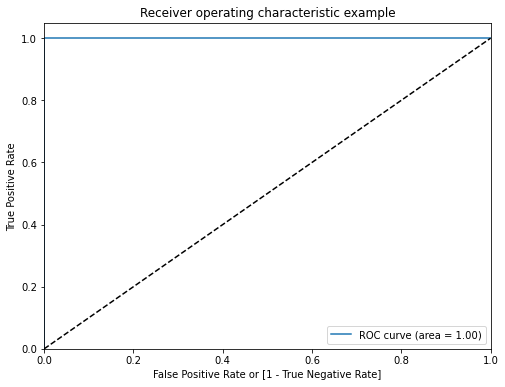

In [172]:
#trainig ROC curve
t_auc_score, t_fpr, t_tpr, t_thresholds = ml.draw_roc_curve(radm_best,X_train,y_train)

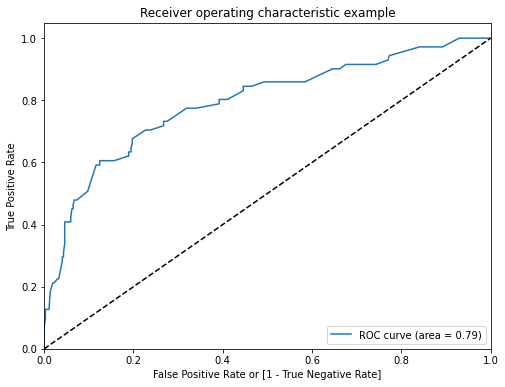

In [173]:
#Test ROC curve
auc_score, fpr, tpr, thresholds = ml.draw_roc_curve(radm_best,x_test,y_test)

In [174]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted )
    sn.heatmap(cm, annot=True, fmt='.2f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show() 

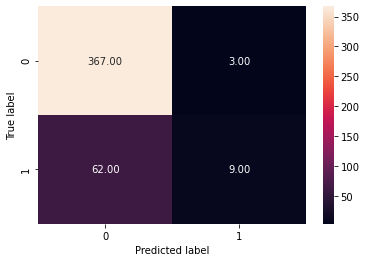

In [175]:
#make predictions
y_pred = radm_best.predict(x_test)
draw_cm(y_test,y_pred)

In [176]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       370
           1       0.75      0.13      0.22        71

    accuracy                           0.85       441
   macro avg       0.80      0.56      0.57       441
weighted avg       0.84      0.85      0.81       441



### Hyper parameter tunnig for Adaboost

In [208]:
t_p = [{'learning_rate':[.5,1,1.5,2,2.5,3]}]
ada = AdaBoostClassifier()
g = GridSearchCV(ada,t_p)
g.fit(X_train,y_train)
g.best_params_

{'learning_rate': 1}

## Adaboost

In [177]:
ada_clf = AdaBoostClassifier()  #default learning rate is 1
ada_clf.fit(X_train,y_train)

AdaBoostClassifier()

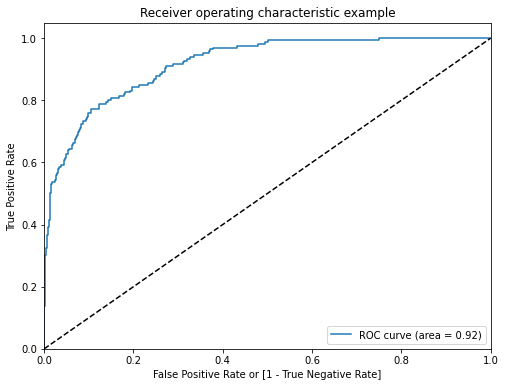

In [178]:
#train ROC curve
t_auc_score, t_fpr, t_tpr, t_thresholds = ml.draw_roc_curve(ada_clf,X_train,y_train)

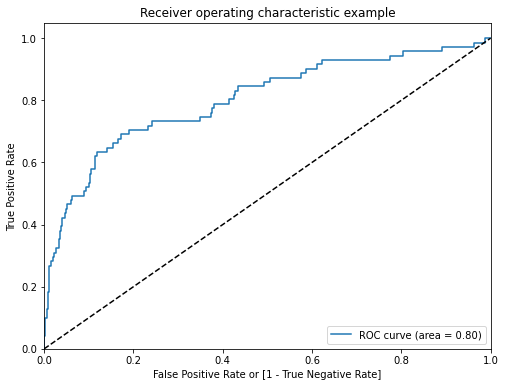

In [179]:
#Test ROC curve
auc_score, fpr, tpr, thresholds = ml.draw_roc_curve(ada_clf,x_test,y_test)

In [180]:
y_pred = ada_clf.predict(x_test)

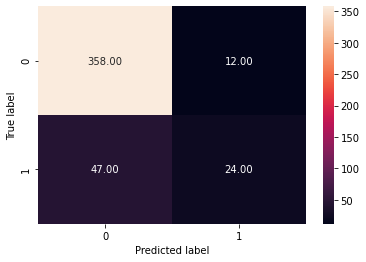

In [181]:
draw_cm(y_test,y_pred)

In [182]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       370
           1       0.67      0.34      0.45        71

    accuracy                           0.87       441
   macro avg       0.78      0.65      0.69       441
weighted avg       0.85      0.87      0.85       441



In [183]:
AdaBoostClassifier()

1.0

## Testing Random Forest with different CCP_Alpha

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       0.00      0.00      0.00        71

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.70      0.84      0.77       441



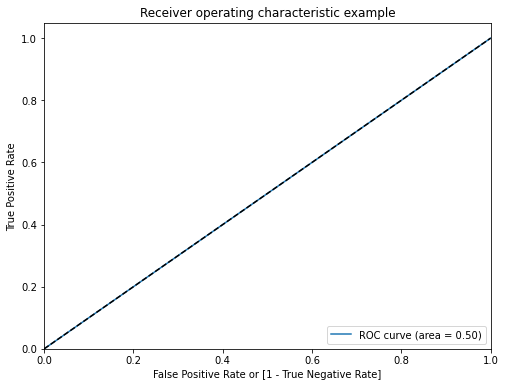

In [203]:
#ccp_alpha = .5
radm_test = RandomForestClassifier(max_depth=15,n_estimators =50,max_features='sqrt',ccp_alpha=0.5)
radm_test.fit(X_train,y_train)
y_p = radm_test.predict(x_test)
print(metrics.classification_report(y_test,y_p))
auc_score, fpr, tpr, thresholds = ml.draw_roc_curve(radm_test,x_test,y_test)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       0.00      0.00      0.00        71

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.70      0.84      0.77       441



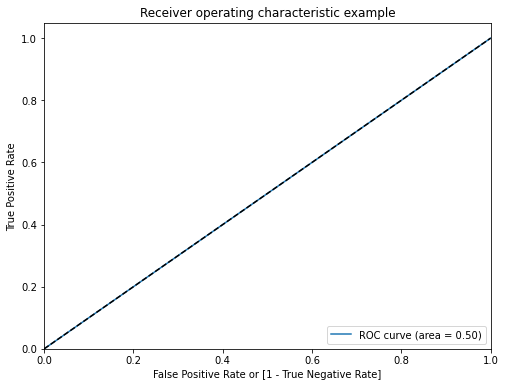

In [206]:
#ccp_alpha = 1.0
radm_test = RandomForestClassifier(max_depth=15,n_estimators =50,max_features='sqrt',ccp_alpha=1.0)
radm_test.fit(X_train,y_train)
y_p = radm_test.predict(x_test)
print(metrics.classification_report(y_test,y_p))
auc_score, fpr, tpr, thresholds = ml.draw_roc_curve(radm_test,x_test,y_test)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       0.00      0.00      0.00        71

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.70      0.84      0.77       441



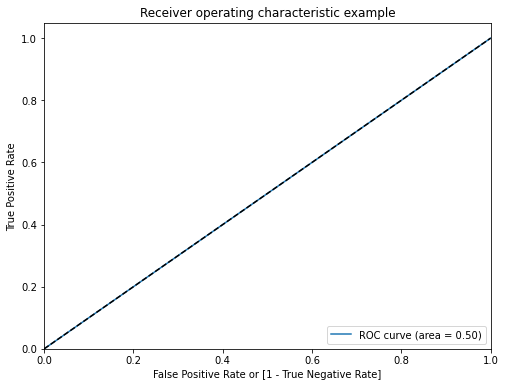

In [207]:
#ccp_alpha = 3
radm_test = RandomForestClassifier(max_depth=15,n_estimators =50,max_features='sqrt',ccp_alpha=3)
radm_test.fit(X_train,y_train)
y_p = radm_test.predict(x_test)
print(metrics.classification_report(y_test,y_p))
auc_score, fpr, tpr, thresholds = ml.draw_roc_curve(radm_test,x_test,y_test)

### Testing Adaboost with different learning rate

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       370
           1       0.75      0.21      0.33        71

    accuracy                           0.86       441
   macro avg       0.81      0.60      0.63       441
weighted avg       0.85      0.86      0.83       441



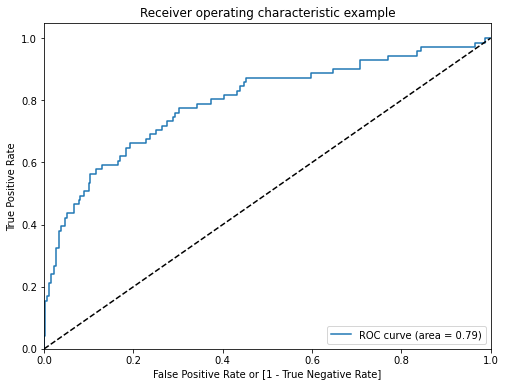

In [199]:
#learning rate 0.5
ada_test = AdaBoostClassifier(learning_rate=.5)
ada_test.fit(X_train,y_train)
y_p = ada_test.predict(x_test)
print(metrics.classification_report(y_test,y_p))
auc_score, fpr, tpr, thresholds = ml.draw_roc_curve(ada_test,x_test,y_test)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       370
           1       0.55      0.45      0.50        71

    accuracy                           0.85       441
   macro avg       0.72      0.69      0.70       441
weighted avg       0.84      0.85      0.85       441



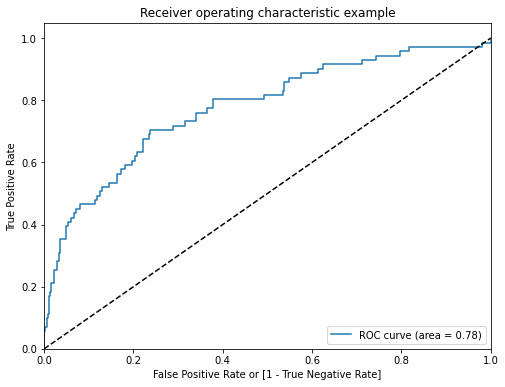

In [201]:
#learning rate 1.5
ada_test = AdaBoostClassifier(learning_rate=1.5)
ada_test.fit(X_train,y_train)
y_p = ada_test.predict(x_test)
print(metrics.classification_report(y_test,y_p))
auc_score, fpr, tpr, thresholds = ml.draw_roc_curve(ada_test,x_test,y_test)

              precision    recall  f1-score   support

           0       0.88      0.74      0.81       370
           1       0.27      0.49      0.35        71

    accuracy                           0.70       441
   macro avg       0.58      0.62      0.58       441
weighted avg       0.79      0.70      0.73       441



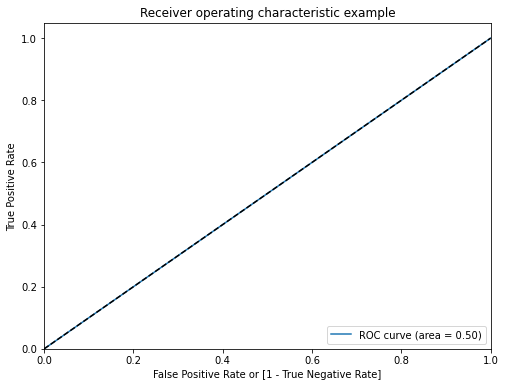

In [200]:
#learning rate 2
ada_test = AdaBoostClassifier(learning_rate=2)
ada_test.fit(X_train,y_train)
y_p = ada_test.predict(x_test)
print(metrics.classification_report(y_test,y_p))
auc_score, fpr, tpr, thresholds = ml.draw_roc_curve(ada_test,x_test,y_test)

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       370
           1       0.16      1.00      0.28        71

    accuracy                           0.17       441
   macro avg       0.58      0.51      0.15       441
weighted avg       0.87      0.17      0.06       441



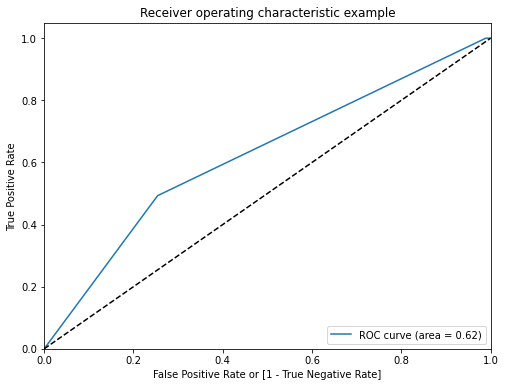

In [202]:
#learning rate 3
ada_test = AdaBoostClassifier(learning_rate=3)
ada_test.fit(X_train,y_train)
y_p = ada_test.predict(x_test)
print(metrics.classification_report(y_test,y_p))
auc_score, fpr, tpr, thresholds = ml.draw_roc_curve(ada_test,x_test,y_test)